<a href="https://colab.research.google.com/github/Roopesh-DMahanthi/lymphoma-cell-detection/blob/master/Lymphoma_Cell_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv('https://github.com/Roopesh-DMahanthi/lymphoma-cell-detection/raw/master/Lymphoma-Dataset.csv') 

In [356]:
print((df.isna()==True).sum())

V1       0
V2       0
V3       0
V4       0
V5       0
        ..
V7127    0
V7128    0
V7129    0
TYPE     0
DTH      0
Length: 7131, dtype: int64


In [357]:
X = df.iloc[:,:-2].values
y1 = df.iloc[:,-2].values
y2 = df.iloc[:,-1].values
print("X - Shape {}".format(X.shape))
print("y1 - Shape {}".format(y1.shape))
print("y2 - Shape {}".format(y2.shape))

X - Shape (77, 7129)
y1 - Shape (77,)
y2 - Shape (77,)


In [0]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.decomposition import PCA

In [0]:
le_c = LabelEncoder()
le_c.fit(y1)
y_map1 = {i : l for i, l in enumerate(le_c.classes_)}
y1 = le_c.transform(y1)
le_d = LabelEncoder()
le_d.fit(y2)
y_map2 = {i : l for i, l in enumerate(le_d.classes_)}
y2 = le_d.transform(y2)

In [360]:
y_map2

{0: 'CURED', 1: 'FATAL'}

In [0]:
X_trn,X_tst,y_trn1,y_tst1 = tts(X,y1,test_size=0.3,random_state=0)
_,_,y_trn2,y_tst2 = tts(X,y2,test_size=0.3,random_state=0)

In [0]:
pca = PCA(n_components= 10)
X_trn = pca.fit_transform(X_trn)
X_tst = pca.fit_transform(X_tst)

In [0]:
sc=StandardScaler()
X_trn=sc.fit_transform(X_trn)
X_tst=sc.fit_transform(X_tst)

In [0]:
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DecTreeC
from sklearn.ensemble import RandomForestClassifier as RndFC
from sklearn.neighbors import KNeighborsClassifier as KnnC
from sklearn.metrics import classification_report as report ,confusion_matrix as cmatrix, accuracy_score

In [0]:
models = ['LogisticRegression','SVC','DecisionTreeClassifier','RandomForestClassifier','KNeighborsClassifier']
accu_types = ['Training Data Accuracy','Testing Data Accuracy']
dict1={}
dict2={}

In [0]:
obj = LogReg(penalty='l2',class_weight='balanced',max_iter=1000)
obj.fit(X_trn,y_trn1)
accu_trn = accuracy_score(obj.predict(X_trn) ,y_trn1)
accu_tst = accuracy_score(obj.predict(X_tst) ,y_tst1)
dict1.update( {models[0] : { accu_types[0] : accu_trn , accu_types[1] : accu_tst}})

In [0]:
obj = SVC(kernel='rbf',degree=3)
obj.fit(X_trn,y_trn1)
accu_trn = accuracy_score(obj.predict(X_trn) ,y_trn1)
accu_tst = accuracy_score(obj.predict(X_tst) ,y_tst1)
dict1.update( {models[1] : { accu_types[0] : accu_trn , accu_types[1] : accu_tst}})

In [0]:
obj = DecTreeC(criterion='gini',splitter='best',max_depth=10,min_samples_leaf=1)
obj.fit(X_trn,y_trn1)
accu_trn = accuracy_score(obj.predict(X_trn) ,y_trn1)
accu_tst = accuracy_score(obj.predict(X_tst) ,y_tst1)
dict1.update( {models[2] : { accu_types[0] : accu_trn , accu_types[1] : accu_tst}})

In [0]:
obj = RndFC(n_estimators=50,criterion='gini',random_state=0)
obj.fit(X_trn,y_trn1)
accu_trn = accuracy_score(obj.predict(X_trn) ,y_trn1)
accu_tst = accuracy_score(obj.predict(X_tst) ,y_tst1)
dict1.update( {models[3] : { accu_types[0] : accu_trn , accu_types[1] : accu_tst}})

In [0]:
obj = KnnC(n_neighbors=10,weights='distance',metric='minkowski')
obj.fit(X_trn,y_trn1)
accu_trn = accuracy_score(obj.predict(X_trn) ,y_trn1)
accu_tst = accuracy_score(obj.predict(X_tst) ,y_tst1)
dict1.update( {models[4] : { accu_types[0] : accu_trn , accu_types[1] : accu_tst}})

In [0]:
obj = LogReg(penalty='l2',class_weight='balanced',max_iter=1000)
obj.fit(X_trn,y_trn2)
accu_trn = accuracy_score(obj.predict(X_trn) ,y_trn2)
accu_tst = accuracy_score(obj.predict(X_tst) ,y_tst2)
dict2.update( {models[0] : { accu_types[0] : accu_trn , accu_types[1] : accu_tst}})

In [0]:
obj = SVC(kernel='rbf',degree=3)
obj.fit(X_trn,y_trn2)
accu_trn = accuracy_score(obj.predict(X_trn) ,y_trn2)
accu_tst = accuracy_score(obj.predict(X_tst) ,y_tst2)
dict2.update( {models[1] : { accu_types[0] : accu_trn , accu_types[1] : accu_tst}})

In [0]:
obj = DecTreeC(criterion='gini',splitter='best',max_depth=10,min_samples_leaf=1)
obj.fit(X_trn,y_trn1)
accu_trn = accuracy_score(obj.predict(X_trn) ,y_trn1)
accu_tst = accuracy_score(obj.predict(X_tst) ,y_tst1)
dict2.update( {models[2] : { accu_types[0] : accu_trn , accu_types[1] : accu_tst}})

In [0]:
obj = RndFC(n_estimators=50,criterion='gini',random_state=0)
obj.fit(X_trn,y_trn2)
accu_trn = accuracy_score(obj.predict(X_trn) ,y_trn2)
accu_tst = accuracy_score(obj.predict(X_tst) ,y_tst2)
dict2.update( {models[3] : { accu_types[0] : accu_trn , accu_types[1] : accu_tst}})

In [0]:
obj = KnnC(n_neighbors=10,weights='distance',metric='minkowski')
obj.fit(X_trn,y_trn2)
accu_trn = accuracy_score(obj.predict(X_trn) ,y_trn2)
accu_tst = accuracy_score(obj.predict(X_tst) ,y_tst2)
dict2.update( {models[4] : { accu_types[0] : accu_trn , accu_types[1] : accu_tst}})

In [376]:
trn_accs1=[]
tst_accs1=[]
for k,v in dict1.items():
  print(k)
  for k2,v2 in v.items():
    print("\t %s - %f"%(k2,v2))
    if(k2==accu_types[0]):
      trn_accs1.append(v2)
    else:
      tst_accs1.append(v2)
  print()

LogisticRegression
	 Training Data Accuracy - 0.962264
	 Testing Data Accuracy - 0.625000

SVC
	 Training Data Accuracy - 0.962264
	 Testing Data Accuracy - 0.583333

DecisionTreeClassifier
	 Training Data Accuracy - 1.000000
	 Testing Data Accuracy - 0.625000

RandomForestClassifier
	 Training Data Accuracy - 1.000000
	 Testing Data Accuracy - 0.666667

KNeighborsClassifier
	 Training Data Accuracy - 1.000000
	 Testing Data Accuracy - 0.541667



In [377]:
trn_accs2=[]
tst_accs2=[]
for k,v in dict2.items():
  print(k)
  for k2,v2 in v.items():
    print("\t %s - %f"%(k2,v2))
    if(k2==accu_types[0]):
      trn_accs2.append(v2)
    else:
      tst_accs2.append(v2)
  print()

LogisticRegression
	 Training Data Accuracy - 0.830189
	 Testing Data Accuracy - 0.625000

SVC
	 Training Data Accuracy - 0.905660
	 Testing Data Accuracy - 0.416667

DecisionTreeClassifier
	 Training Data Accuracy - 1.000000
	 Testing Data Accuracy - 0.583333

RandomForestClassifier
	 Training Data Accuracy - 1.000000
	 Testing Data Accuracy - 0.583333

KNeighborsClassifier
	 Training Data Accuracy - 1.000000
	 Testing Data Accuracy - 0.541667



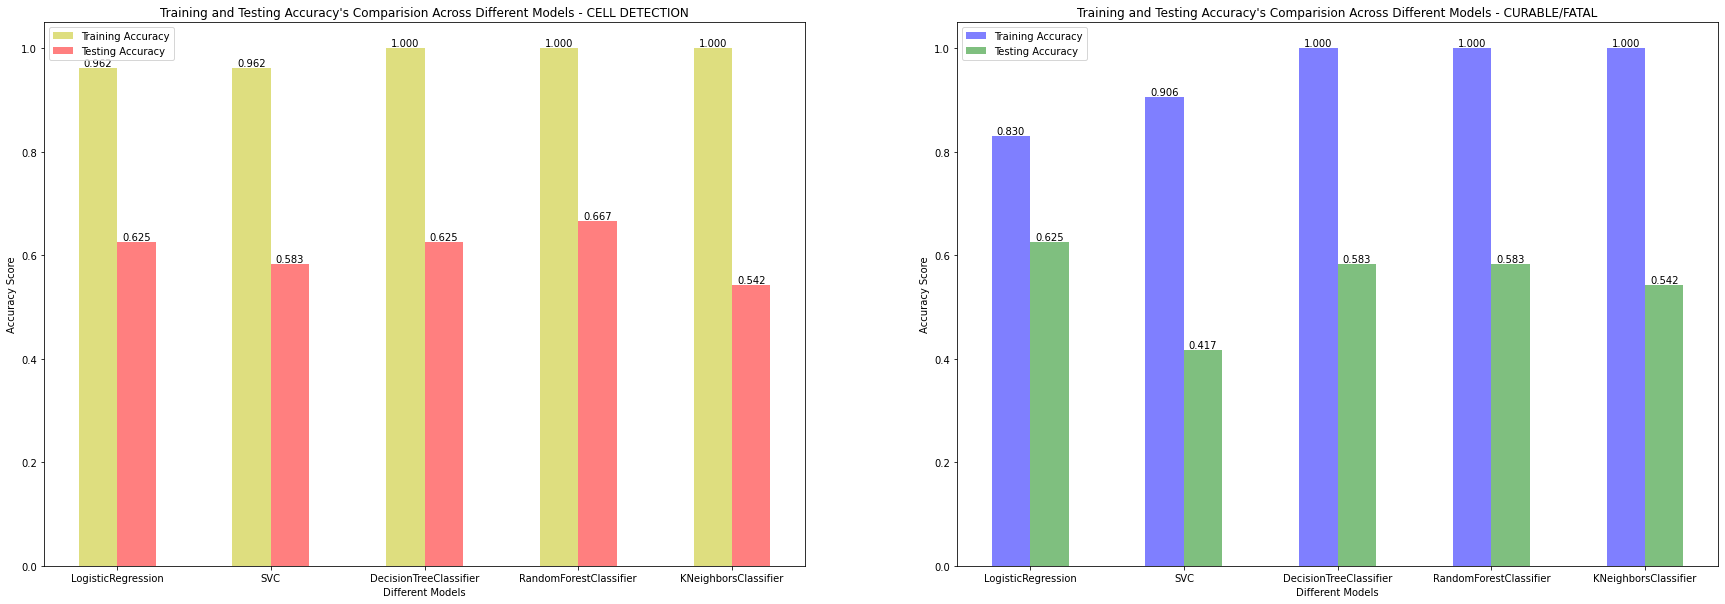

In [385]:
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height,'%.3f' %float(round(height,3)),ha='center', va='bottom')
ind = np.arange(len(models))
trn_bar = plt.bar(ind, trn_accs1, 0.25,alpha=0.5,color='y',label='Training Accuracy')
autolabel(trn_bar)
tst_bar = plt.bar(ind + 0.25, tst_accs1, 0.25,alpha=0.5,color='r',label='Testing Accuracy')
autolabel(tst_bar)
plt.xlabel('Different Models')
plt.ylabel('Accuracy Score')
plt.title("Training and Testing Accuracy's Comparision Across Different Models - CELL DETECTION")
plt.xticks(ind + 0.125, models)
plt.legend()
plt.subplot(1,2,2)
#plt.figure(figsize=(20,12))
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height,'%.3f' %float(round(height,3)),ha='center', va='bottom')
ind = np.arange(len(models))
trn_bar = plt.bar(ind, trn_accs2, 0.25,alpha=0.5,color='b',label='Training Accuracy')
autolabel(trn_bar)
tst_bar = plt.bar(ind + 0.25, tst_accs2, 0.25,alpha=0.5,color='g',label='Testing Accuracy')
autolabel(tst_bar)
plt.xlabel('Different Models')
plt.ylabel('Accuracy Score')
plt.title("Training and Testing Accuracy's Comparision Across Different Models - CURABLE/FATAL")
plt.xticks(ind + 0.125, models)
plt.legend()
plt.show()